### 图像分类的经典模型
leNET-5  
AlexNet是ImageNet Challenge图像识别2012年的冠军；  
VGG19是2014年的亚军；  
GooleNet/Inception是2014年的冠军  

###### 使用Inception-V3来做各种图像的识别

In [1]:
import tensorflow as tf
import os, re
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
os.chdir('E:\python\AI微专业（计算机视觉）\第六课-深度学习框架I：Tensorflow\demo\使用inception-v3做各种图像识别')

(1008,)
images/9001519342.jpg


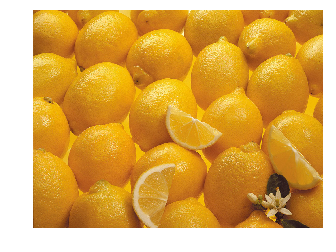

orange: prob is 51.417505741119385%
lemon: prob is 14.988397061824799%
jackfruit, jak, jack: prob is 1.913461647927761%
spaghetti squash: prob is 0.5985215771943331%
butternut squash: prob is 0.33651350531727076%

(1008,)
images/car 2.jpg


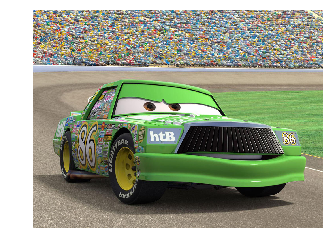

racer, race car, racing car: prob is 70.93032598495483%
sports car, sport car: prob is 6.365443021059036%
car wheel: prob is 4.838476702570915%
pickup, pickup truck: prob is 2.9049692675471306%
cab, hack, taxi, taxicab: prob is 0.9246987290680408%

(1008,)
images/car.jpg


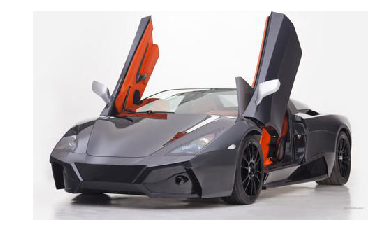

sports car, sport car: prob is 93.50681900978088%
convertible: prob is 1.1129006743431091%
racer, race car, racing car: prob is 0.8678518235683441%
chain saw, chainsaw: prob is 0.29787805397063494%
car wheel: prob is 0.2759160241112113%

(1008,)
images/cat.jpg


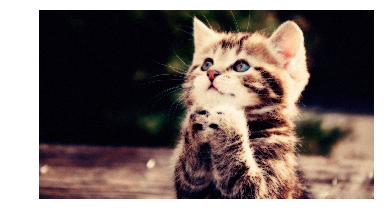

Egyptian cat: prob is 55.33595085144043%
tabby, tabby cat: prob is 25.70098638534546%
tiger cat: prob is 8.283019065856934%
lynx, catamount: prob is 5.682998523116112%
hyena, hyaena: prob is 0.2748220693320036%

(1008,)
images/dog.jpg


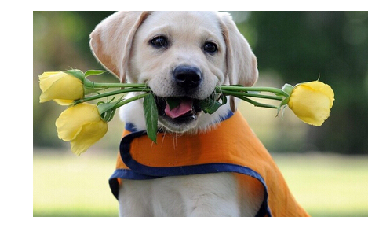

Labrador retriever: prob is 95.1451063156128%
golden retriever: prob is 2.06524096429348%
tennis ball: prob is 0.3992697224020958%
beagle: prob is 0.09297305950894952%
Saluki, gazelle hound: prob is 0.06962019833736122%

(1008,)
images/dog2.jpg


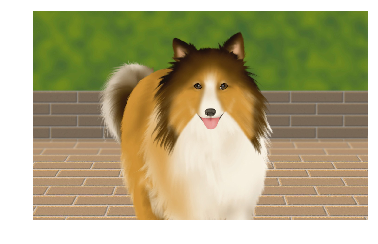

Shetland sheepdog, Shetland sheep dog, Shetland: prob is 58.697980642318726%
collie: prob is 11.861417442560196%
papillon: prob is 2.3862017318606377%
Pomeranian: prob is 0.2958962693810463%
Border collie: prob is 0.24061910808086395%

(1008,)
images/fish.jpg


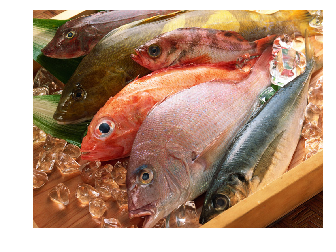

barracouta, snoek: prob is 36.674535274505615%
tench, Tinca tinca: prob is 7.326188683509827%
gar, garfish, garpike, billfish, Lepisosteus osseus: prob is 4.962198808789253%
butcher shop, meat market: prob is 3.8659725338220596%
coho, cohoe, coho salmon, blue jack, silver salmon, Oncorhynchus kisutch: prob is 3.8353625684976578%

(1008,)
images/plane.jpg


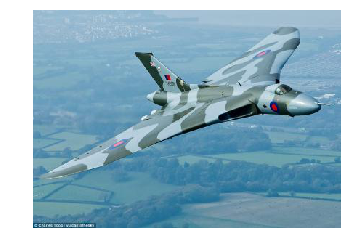

warplane, military plane: prob is 81.1136245727539%
wing: prob is 6.259871274232864%
aircraft carrier, carrier, flattop, attack aircraft carrier: prob is 1.2099831365048885%
projectile, missile: prob is 1.1363297700881958%
missile: prob is 0.9724379517138004%

(1008,)
images/seaside.jpg


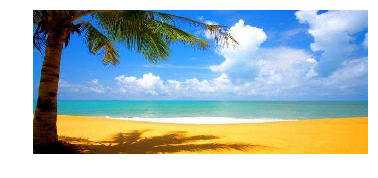

seashore, coast, seacoast, sea-coast: prob is 85.50215363502502%
sandbar, sand bar: prob is 8.790551126003265%
lakeside, lakeshore: prob is 2.545667439699173%
sarong: prob is 0.7453413680195808%
coral reef: prob is 0.3543225582689047%



In [2]:
class NodeLookup(object):
    '''
    完成的主要功能是将两个文件的id和图片label拼接起来
    '''
    def __init__(self):
        uid_lookup_path = 'inception_model/imagenet_2012_challenge_label_map_proto.pbtxt'
        label_lookup_path = 'inception_model/imagenet_synset_to_human_label_map.txt'
        self.node_lookup = self.load(uid_lookup_path, label_lookup_path)
        
    def load(self, uid_lookup_path, label_lookup_path):
        '''
        因为有两个文件，所以要将其id与label通过convert_before_uid一一对应起来
        '''
        uid_content = tf.gfile.GFile(uid_lookup_path).readlines()
        uid_dict = {}
        for line in uid_content:
            line = line.strip('\n')
            if line.startswith('  target_class:'):
                real_uid = int(line.split(': ')[1])
            if line.startswith('  target_class_string'):
                convert_before_uid = line.split(': ')[1][1:-1]    # [1:-1]是为了去掉引号
                uid_dict[real_uid] = convert_before_uid
        
        labels_content = tf.gfile.GFile(label_lookup_path).readlines()
        labels_dict = {}
        for line in labels_content:
            line = line.strip('\n')    # 去掉换行符
            lines = line.split('\t')
            convert_before_uid = lines[0]
            clabel = lines[1]
            labels_dict[convert_before_uid] = clabel
            
        # 将uid_dict与labels_dict建立映射关系
        node_id_to_name = {}
        for key, val in uid_dict.items():
#             print(key,val)    # 357 n11939491
            name = labels_dict[val]
            node_id_to_name[key] = name
        return node_id_to_name
    
    def id_to_label(self, node_id):
        if node_id not in self.node_lookup:
            return 'not exist'
        return self.node_lookup[node_id]
    
# 创建一个图来存放读取到的谷歌训练好的模型
with tf.gfile.GFile('inception_model/classify_image_graph_def.pb', 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    tf.import_graph_def(graph_def, name='')

with tf.Session() as sess:
    softmax_tensor = sess.graph.get_tensor_by_name('softmax:0')
    # 遍历目录
    for root, dirs, files in os.walk('images/'):
        for file in files:
            # 载入图片
            image_data = tf.gfile.GFile(os.path.join(root, file), 'rb').read()
            pred = sess.run(softmax_tensor, {'DecodeJpeg/contents:0':image_data})
            pred = np.squeeze(pred)    # 把pred转换为一维数组
            print(pred.shape)    # (1008,) 因为当时谷歌训练时有添加了8个类别
            image_path = os.path.join(root, file)
            print(image_path)
            image = Image.open(image_path)
            plt.imshow(image)
            plt.axis('off')
            plt.show()
            # 对预测结果排序
            top_k = pred.argsort()[-5:][::-1]    # 取最后五个数据，并对数据取倒序 [0.0005,0.1230,....]所对应的数字索引
#             print(top_k)    # car: [274 268 273 382 563]
            node_lookup = NodeLookup()
            for node_id in top_k:
#                 print(type(node_id))    # numpy.int64
                image_label = node_lookup.id_to_label(node_id)
                prob = pred[node_id]
                print('{}: prob is {}%'.format(image_label,prob*100))
            print()

###### 能够详细预测出某一类别